# Building a House Price Predictor API  
The client is interested in forecasting houses so the company can look to invest. Rather than using a registered valuer they're looking for something which can be done using the latest technology. Jamie has collected some data on existing house prices over the last few years and has asked to see what you can do. 

# 1. Import Data

In [1]:
import pandas as pd
import numpy as np

%load_ext jupyter_black

In [2]:
# Load in data
df = pd.read_csv("regressiondata.csv", index_col="ID")

In [3]:
df.shape

(9356, 6)

In [4]:
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [5]:
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [6]:
df.iloc[9355]

TransactionDate         2020.12
HouseAge                   20.0
DistanceToStation    584.007146
NumberOfPubs                4.0
PostCode                 5614.0
HousePrice               403096
Name: 9355, dtype: object

# 2. Split Data to Prevent Snooping Bias

In [7]:
# Import splitting function
from sklearn.model_selection import train_test_split

In [8]:
# Split data into training and testin
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [9]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# 3. Exploratory Data Analysis

## Bird's Eye View

In [10]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [11]:
# Get information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [12]:
# Create summary statistics
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [13]:
# Type cast incorrect datatypes to new datatypes
train["PostCode"] = train["PostCode"].astype(str)
train["TransactionDate"] = train["TransactionDate"].astype(str)
# train['HousePrice'] = train['HousePrice'].astype(float)

In [14]:
# Create summary statistics for non-numeric features
train.describe(include="object")

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


# Extract numerical columns

### Plot Distributions

In [15]:
!pip show seaborn

Name: seaborn
Version: 0.13.0
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/valentinmonney/Desktop/Full Stack Machine Learning/fullstack/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [16]:
# import data viz libs
from matplotlib import pyplot as plt
import seaborn as sns

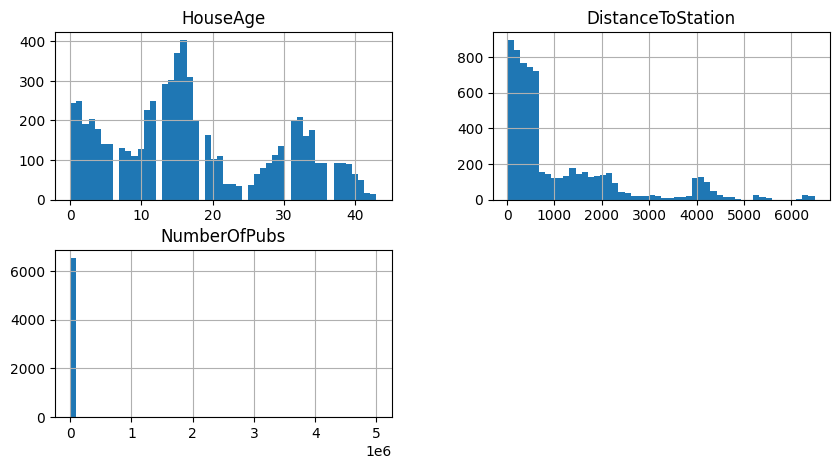

In [17]:
# Plot distributions
train.hist(figsize=(10, 5), bins=50)
plt.show()

### Why isn't House Price Showing up as Numeric?

In [18]:
# Filter dataset based on HousePrice == '??'
train.query("HousePrice == '??'")

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [19]:
# Drop row that equal '??'
train = train[train["HousePrice"] != "??"]

In [20]:
# Double check if the row has been dropped
train.query("HousePrice == '??'")

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [21]:
# Overwrite the house price column with the converted column
train["HousePrice"] = train["HousePrice"].astype(float)

In [22]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

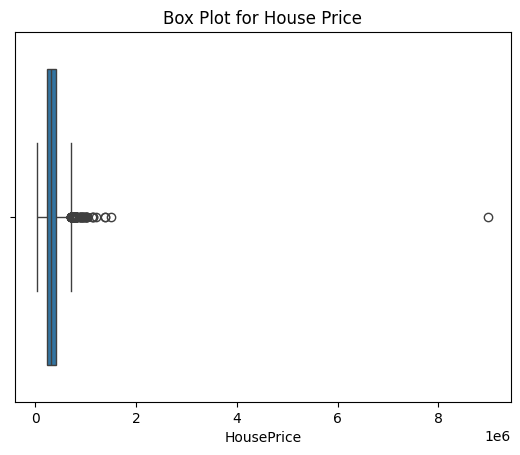

In [23]:
# Create a box plot for house prices
sns.boxplot(x=train["HousePrice"])
plt.title("Box Plot for House Price")
plt.show()

### Drop Outlier 

In [24]:
# Find the outlier
train.sort_values("HousePrice").tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [25]:
# Drop the row where 'ID' is 8445
train = train.drop(8445)
train.sort_values("HousePrice").tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


### What's happening with pubs

In [26]:
train.sort_values("NumberOfPubs").tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [27]:
train.drop(13, inplace=True)

In [28]:
train.sort_values("NumberOfPubs").tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
3195,2020.11,32.0,324.371247,10.0,5614.0,488918.0
2996,2020.03,28.0,772.777219,10.0,5217.0,299235.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


## Analyse Categorical Variables

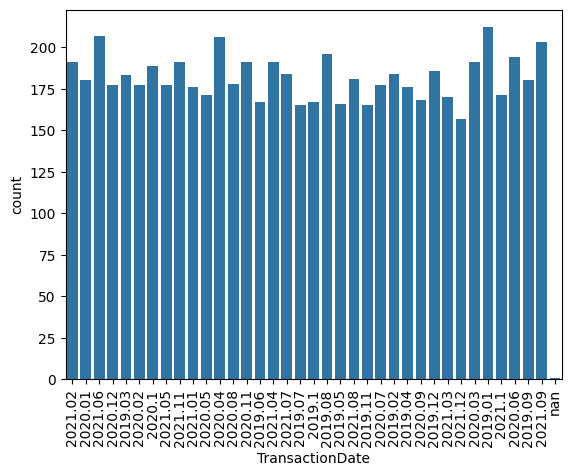

In [29]:
# Create a countplot for transaction date
sns.countplot(x="TransactionDate", data=train)
plt.xticks(rotation=90)
plt.show()

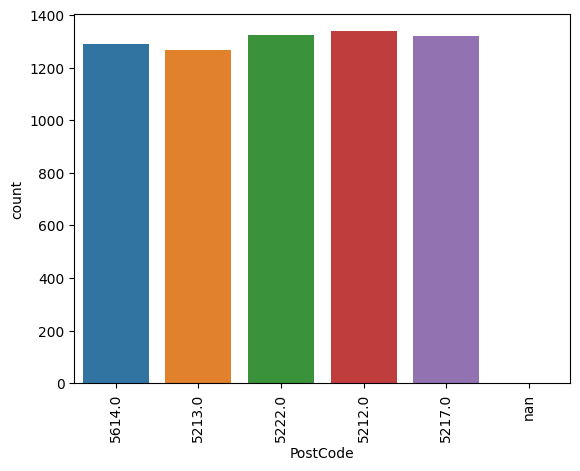

In [30]:
# Create a countplot for transaction date
sns.countplot(x="PostCode", data=train, hue="PostCode")
plt.xticks(rotation=90)
plt.show()

## Analyse Relationships Numeric/Numeric

### Calculate Pearson's Correlation

In [31]:
# Calculate pearsons correlation
train.select_dtypes(exclude="object").corr()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


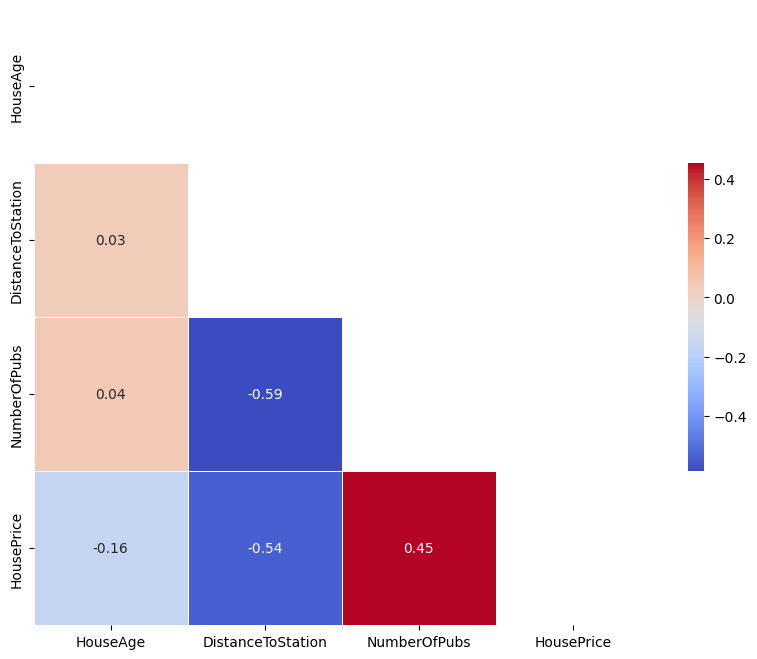

In [32]:
# Calculate the correlation matrix
corr = train.select_dtypes(exclude="object").corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # You can adjust the size as needed

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# Show the plot
plt.show()

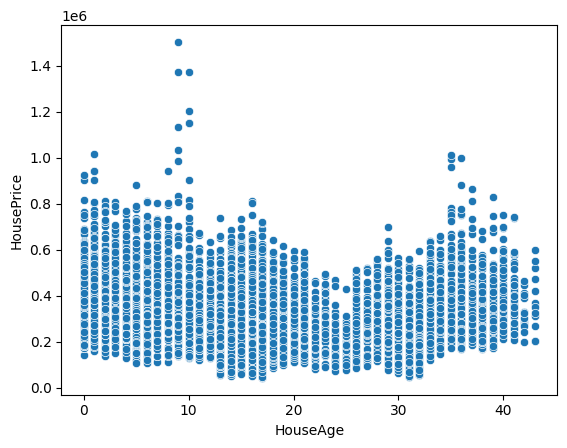

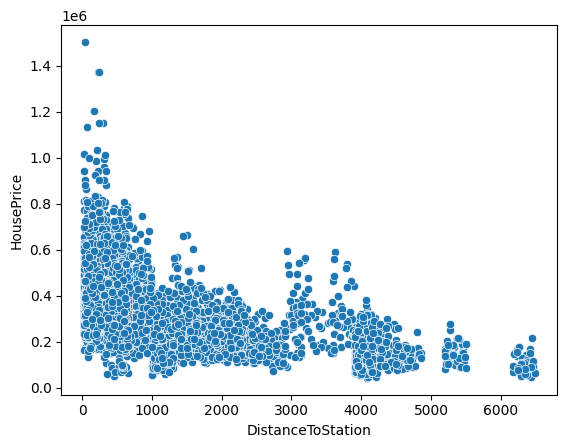

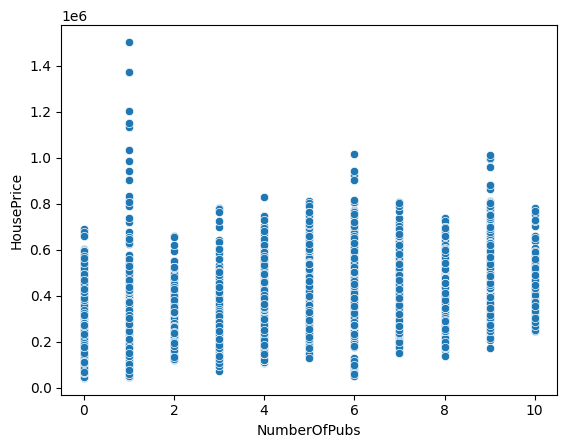

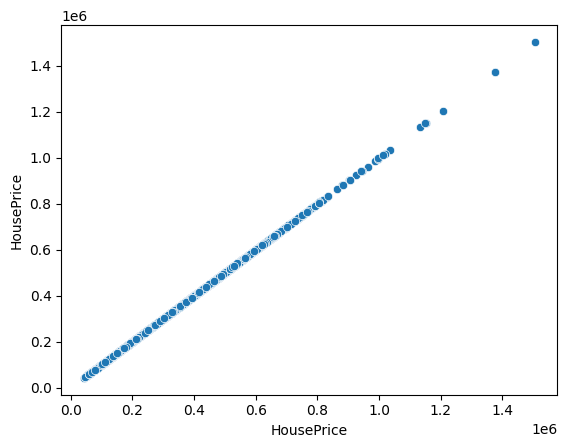

In [33]:
# Extract numerical columns
num_columns = train.select_dtypes(include=["number"]).columns
cat_columns = train.select_dtypes(exclude=["number"]).columns


# Create a scatter plot
for col in num_columns:
    sns.scatterplot(x=col, y="HousePrice", data=train)
    plt.show()

## Analyse Relationships Cat/Num

### Is Post Code Driving Value?

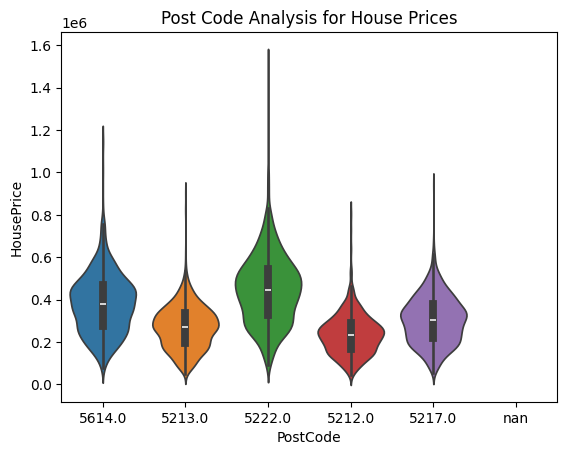

In [34]:
plt.title("Post Code Analysis for House Prices")
sns.violinplot(x="PostCode", y="HousePrice", data=train, hue="PostCode")
plt.show()

### What about the date it was sold?

In [35]:
# check for nulls in a column
train.isnull().sum()

TransactionDate      0
HouseAge             3
DistanceToStation    2
NumberOfPubs         2
PostCode             0
HousePrice           5
dtype: int64

In [36]:
train.value_counts("TransactionDate")

TransactionDate
2019.01    212
2021.06    207
2020.04    206
2021.09    203
2019.08    196
2020.06    194
2020.11    191
2021.11    191
2021.02    191
2020.03    191
2021.04    191
2020.1     189
2019.12    186
2021.07    184
2019.02    184
2019.03    183
2021.08    181
2020.01    180
2019.09    180
2020.08    178
2021.05    177
2020.12    177
2020.07    177
2020.02    177
2021.01    176
2019.04    176
2020.05    171
2021.1     171
2021.03    170
2020.09    168
2019.1     167
2019.06    167
2019.05    166
2019.11    165
2019.07    165
2021.12    157
nan          1
Name: count, dtype: int64

In [37]:
train[train["TransactionDate"] == "nan"]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [38]:
# Drop missing house prices
train = train[(~train["HousePrice"].isnull())]

In [39]:
int(train.iloc[0]["TransactionDate"][5:])

2

In [40]:
# Apply string transformation on Transaction Date
train["YearSold"] = train["TransactionDate"].apply(lambda x: x[:4]).astype(int)
train["MonthSold"] = train["TransactionDate"].apply(lambda x: x[5:]).astype(int)

In [41]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice,YearSold,MonthSold
ID,,,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0,2021,2
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0,2020,1
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0,2021,6
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0,2020,12
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0,2019,3


In [42]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
YearSold               int64
MonthSold              int64
dtype: object

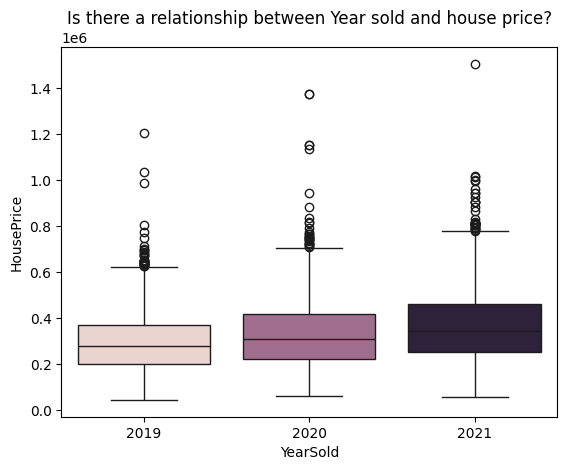

In [43]:
plt.title("Is there a relationship between Year sold and house price?")
sns.boxplot(x="YearSold", y="HousePrice", data=train, hue="YearSold", legend=False)
plt.show()

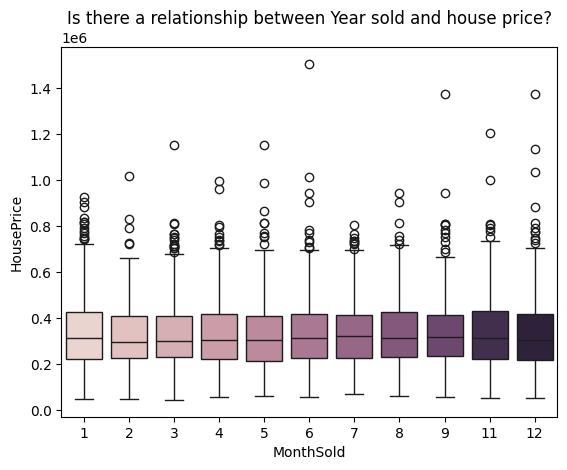

In [44]:
plt.title("Is there a relationship between Year sold and house price?")
sns.boxplot(x="MonthSold", y="HousePrice", data=train, hue="MonthSold", legend=False)
plt.show()

# 4. Data Preprocessing

## Build Preprocessing Function

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [46]:
imputer = SimpleImputer()

In [47]:
imputer.fit(train[["HouseAge", "DistanceToStation", "NumberOfPubs"]])

SimpleImputer()

In [48]:
imputer.transform(
    train[train["HouseAge"].isnull()][["HouseAge", "DistanceToStation", "NumberOfPubs"]]
)

array([[  17.37972167, 1091.84711209,    4.0735474 ],
       [  17.37972167, 1091.84711209,    4.        ]])

In [49]:
train[train["HouseAge"].isnull()][["HouseAge", "DistanceToStation", "NumberOfPubs"]]

,HouseAge,DistanceToStation,NumberOfPubs
ID,,,
2416,NaN,NaN,NaN
24,NaN,NaN,4.0


In [50]:
onehot = OneHotEncoder()
onehot.fit(train[["PostCode"]])
onehot.transform(train[["PostCode"]]).toarray()
onehot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

In [51]:
class Preprocessor(BaseEstimator, TransformerMixin):
    # Train our custom preprocessors
    def fit(self, X, y=None):
        # Create and fit simple imputer
        self.imputer = SimpleImputer()
        self.imputer.fit(X[["HouseAge", "DistanceToStation", "NumberOfPubs"]])

        # Create and fit Standard Scaler
        self.scaler = StandardScaler()
        self.scaler.fit(X[["HouseAge", "DistanceToStation", "NumberOfPubs"]])

        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown="ignore")
        self.onehot.fit(X[["PostCode"]])

        return self

    # Apply our custom preprocessors
    def transform(self, X):
        # Apply simple imputer
        imputed_cols = self.imputer.transform(
            X[["HouseAge", "DistanceToStation", "NumberOfPubs"]]
        )
        onehot_cols = self.onehot.transform(X[["PostCode"]])

        # Copy the df
        transformed_df = X.copy()

        # Apply year and month transforms
        transformed_df["Year"] = (
            transformed_df["TransactionDate"].apply(lambda x: x[:4]).astype(int)
        )
        transformed_df["Month"] = (
            transformed_df["TransactionDate"].apply(lambda x: x[5:]).astype(int)
        )
        transformed_df = transformed_df.drop("TransactionDate", axis=1)

        # Apply transformed columns
        transformed_df[["HouseAge", "DistanceToStation", "NumberOfPubs"]] = imputed_cols
        transformed_df[
            ["HouseAge", "DistanceToStation", "NumberOfPubs"]
        ] = self.scaler.transform(
            transformed_df[["HouseAge", "DistanceToStation", "NumberOfPubs"]]
        )

        # Drop existing Post Code column and replace with one hot equiv
        transformed_df = transformed_df.drop("PostCode", axis=1)
        transformed_df[
            self.onehot.get_feature_names_out()
        ] = onehot_cols.toarray().astype(int)

        return transformed_df

In [52]:
preproc = Preprocessor()

In [53]:
preproc.fit(train)

Preprocessor()

## Preview Preprocessed Data

In [54]:
preprocessed_df = preproc.transform(train.drop(["YearSold", "MonthSold"], axis=1))
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [55]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
Year                   int64
Month                  int64
PostCode_5212.0        int64
PostCode_5213.0        int64
PostCode_5217.0        int64
PostCode_5222.0        int64
PostCode_5614.0        int64
dtype: object

In [56]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   Year               6541 non-null   int64  
 5   Month              6541 non-null   int64  
 6   PostCode_5212.0    6541 non-null   int64  
 7   PostCode_5213.0    6541 non-null   int64  
 8   PostCode_5217.0    6541 non-null   int64  
 9   PostCode_5222.0    6541 non-null   int64  
 10  PostCode_5614.0    6541 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 613.2 KB


## Clean up Analysis Features

In [57]:
train = train.drop(["YearSold", "MonthSold"], axis=1)

In [58]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


## Create X and y values

In [59]:
X_train = train.drop("HousePrice", axis=1)
y_train = train["HousePrice"]

# 5. Modelling

## Import ML Dependencies

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

## Create Pipelines

In [61]:
pipelines = {
    "ridge": make_pipeline(Preprocessor(), Ridge()),
    "rf": make_pipeline(Preprocessor(), RandomForestRegressor()),
    "gb": make_pipeline(Preprocessor(), GradientBoostingRegressor()),
    "xg": make_pipeline(Preprocessor(), XGBRegressor()),
}

### Training Outside of a Pipeline

In [62]:
X_temp = preprocessed_df.drop("HousePrice", axis=1)
y_temp = preprocessed_df["HousePrice"]

In [63]:
ridgemodel = Ridge()

In [64]:
ridgemodel.fit(X_temp, y_temp)

Ridge()

In [65]:
ridgemodel.predict(X_temp)

array([453158.70403588, 281048.56313422, 473919.1346858 , ...,
       305550.331     , 349468.7929066 , 301856.67576402])

## Create Tuning Grids

In [66]:
pipelines["xg"].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'xgbregressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
       

In [67]:
pipelines["ridge"]["ridge"].alpha

1.0

In [68]:
grid = {
    "ridge": {"ridge__alpha": [0.05, 0.25, 0.5, 1.0]},
    "rf": {
        "randomforestregressor__n_estimators": [100, 200, 300],
        "randomforestregressor__max_depth": [5, 6, 7, None],
    },
    "gb": {
        "gradientboostingregressor__n_estimators": [100, 200, 300],
        "gradientboostingregressor__max_depth": [5, 6, 7, None],
    },
    "xg": {
        "xgbregressor__n_estimators": [100, 200, 300],
        "xgbregressor__max_depth": [5, 6, 7, None],
    },
}

## Train Models and Perform HPO

In [69]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [70]:
X_train

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0
5758,2020.01,17.0,614.851833,3.0,5213.0
4030,2021.06,34.0,285.892687,9.0,5614.0
8447,2020.12,0.0,195.213314,6.0,5222.0
4370,2019.03,34.0,124.082230,8.0,5212.0
...,...,...,...,...,...
664,2020.08,37.0,375.427313,1.0,5217.0
7540,2020.08,34.0,114.362370,5.0,5212.0
7221,2020.02,16.0,605.834036,2.0,5217.0


In [71]:
fit_models = {}


for algo, pipeline in tqdm(pipelines.items()):
    try:
        print(f"Starting training for: {algo}")
        model = GridSearchCV(pipeline, grid[algo], cv=10, scoring="r2", verbose=1)
        model.fit(X_train, y_train)
        fit_models[algo] = model
    except Exception as e:
        print(f"Model {algo} had an error: {e}")

  0%|          | 0/4 [00:00<?, ?it/s]

Starting training for: ridge
Fitting 10 folds for each of 4 candidates, totalling 40 fits


 25%|██▌       | 1/4 [00:00<00:02,  1.07it/s]

Starting training for: rf
Fitting 10 folds for each of 12 candidates, totalling 120 fits


 50%|█████     | 2/4 [02:47<03:16, 98.23s/it]

Starting training for: gb
Fitting 10 folds for each of 12 candidates, totalling 120 fits


 75%|███████▌  | 3/4 [06:58<02:48, 168.18s/it]

Starting training for: xg
Fitting 10 folds for each of 12 candidates, totalling 120 fits


100%|██████████| 4/4 [07:32<00:00, 113.07s/it]


# 6. Evaluate Models

## Import Evaluation Metrics

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error

## Preprocess Test Set For Predictions

### Look for Nulls

In [73]:
# look for nulls in dataset
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [74]:
# Drop any nulls in the house price (target)
test = test[~test.HousePrice.isnull()]

In [75]:
# double check nulls are removed
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

The missing value in HouseAge is ok because we added a simple imputer (mean) in our preprocess function. Most important thing is to not have any null values in the target variable `HousePrice`

### Check datatypes

In [76]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [77]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [78]:
# Fix datatypes in test dataframe
test = test[test["HousePrice"] != "??"]
test["HousePrice"] = test["HousePrice"].astype(float)
test["TransactionDate"] = test["TransactionDate"].astype(str)
test["PostCode"] = test["PostCode"].astype(str)

In [79]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

### Create X_test and y_test 

In [80]:
X_test = test.drop("HousePrice", axis=1)
y_test = test["HousePrice"]

In [81]:
X_test.shape

(2803, 5)

In [82]:
y_test.shape

(2803,)

## Calculate Regression Metrics

In [83]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    r2 = r2_score(y_test, yhat)
    mae = mean_absolute_error(y_test, yhat)
    print(f"{algo}: R2 Score:{r2}, MAE Score:{mae}")

ridge: R2 Score:0.6691443155811763, MAE Score:62578.08779739691
rf: R2 Score:0.8173541083610227, MAE Score:44663.5038958259
gb: R2 Score:0.8634854625060153, MAE Score:38652.35632266512
xg: R2 Score:0.856389713877994, MAE Score:39308.03106325812


## Make Predictions

In [84]:
model = fit_models["gb"]

In [85]:
yhat = model.predict(X_test)

In [86]:
results_df = y_test.to_frame()
results_df["yhat"] = yhat
results_df["delta"] = results_df.HousePrice.astype(float) - results_df.yhat

In [87]:
results_df.to_csv("results.csv")

## Explain model

### Calculate Feature Importance

In [88]:
model.best_estimator_[1]

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [89]:
ensemble = model.best_estimator_["gradientboostingregressor"]
ensemble

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [90]:
model.best_estimator_["gradientboostingregressor"].feature_importances_

array([0.12728477, 0.4676756 , 0.04522473, 0.05185808, 0.00625355,
       0.02391688, 0.00654913, 0.0096129 , 0.17487634, 0.08674801])

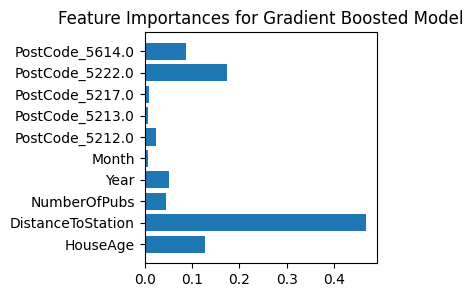

In [91]:
plt.figure(figsize=(3, 3))
plt.title("Feature Importances for Gradient Boosted Model")
plt.barh(ensemble.feature_names_in_, ensemble.feature_importances_)
plt.show()

### Calculate Feature Importance for All Models

In [92]:
import numpy as np

In [93]:
feature_importances = {}
for algo, pipeline in fit_models.items():
    if algo == "ridge":
        coef_ = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
    else:
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [94]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13562337, 0.44487651, 0.05584389, 0.05116972, 0.0347447 ,
        0.00879381, 0.002676  , 0.01205669, 0.16693484, 0.08728046]),
 'gb': array([0.12728477, 0.4676756 , 0.04522473, 0.05185808, 0.00625355,
        0.02391688, 0.00654913, 0.0096129 , 0.17487634, 0.08674801]),
 'xg': array([0.03630189, 0.09950483, 0.02019886, 0.06381075, 0.00548409,
        0.07154408, 0.01112794, 0.07640759, 0.3810329 , 0.23458697],
       dtype=float32)}

In [95]:
importance_df = pd.DataFrame(feature_importances, index=ensemble.feature_names_in_)
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.135623,0.127285,0.036302
DistanceToStation,0.101874,0.444877,0.467676,0.099505
NumberOfPubs,0.031097,0.055844,0.045225,0.020199
Year,0.038686,0.051170,0.051858,0.063811
Month,0.000006,0.034745,0.006254,0.005484
PostCode_5212.0,0.225705,0.008794,0.023917,0.071544
PostCode_5213.0,0.094727,0.002676,0.006549,0.011128
PostCode_5217.0,0.016941,0.012057,0.009613,0.076408
PostCode_5222.0,0.392286,0.166935,0.174876,0.381033
PostCode_5614.0,0.082193,0.087280,0.086748,0.234587


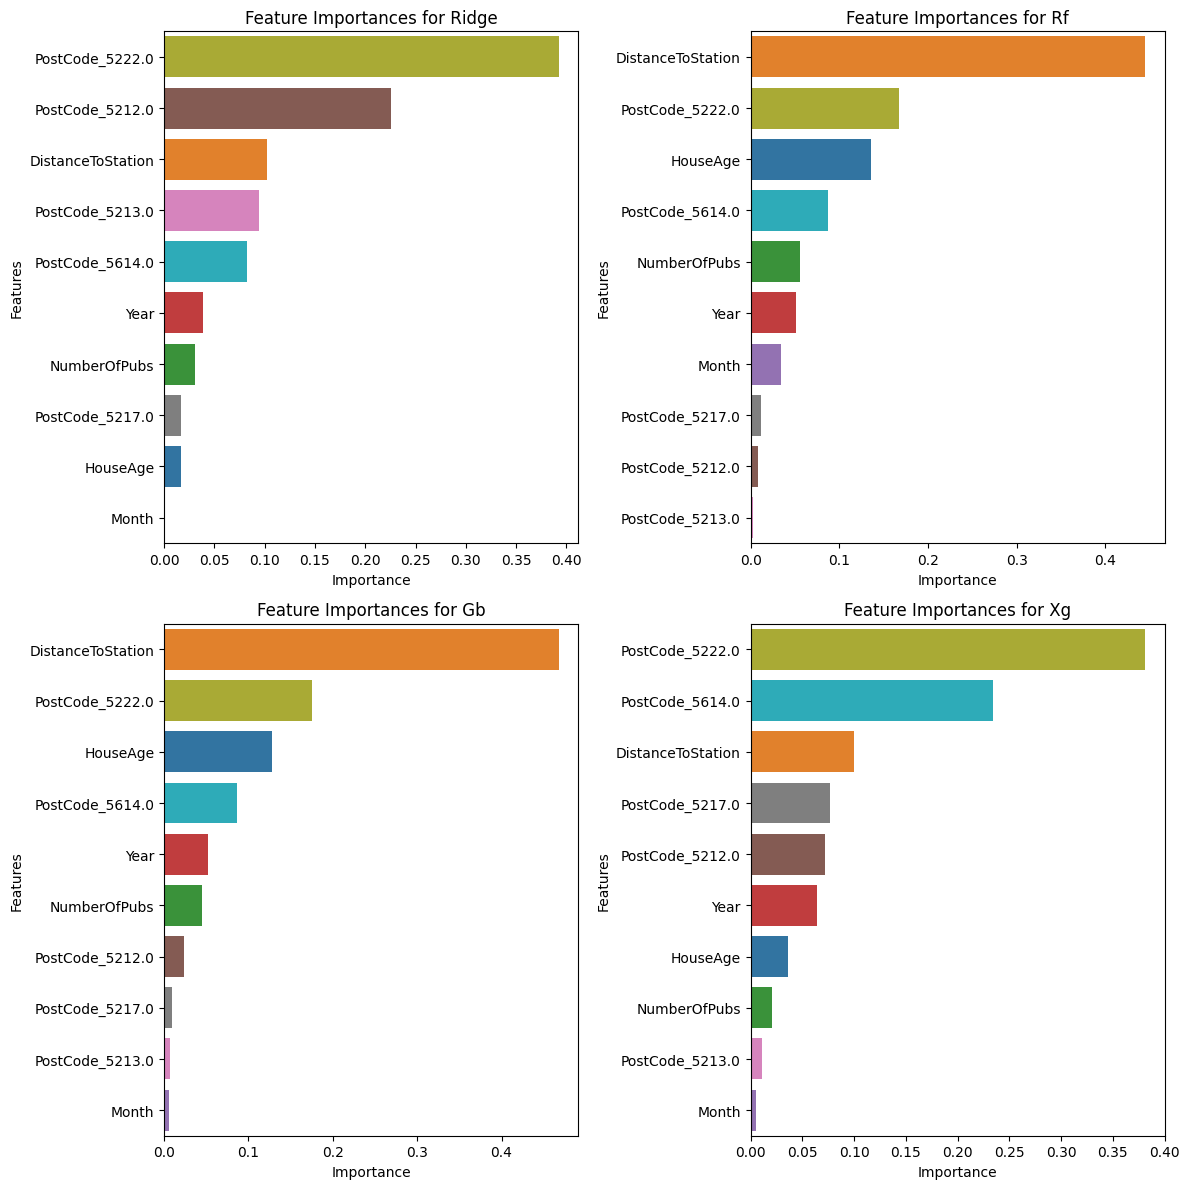

In [96]:
# Define a color palette
palette = sns.color_palette("tab10", len(importance_df.index))
color_dict = dict(zip(importance_df.index, palette))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, model_name in enumerate(fit_models.keys()):
    sorted_imp = importance_df.sort_values(by=model_name, ascending=False)

    # Use the 'color' parameter with mapped colors
    sns.barplot(
        x=sorted_imp[model_name],
        y=sorted_imp.index,
        ax=axes[i],
        palette=[color_dict[feature] for feature in sorted_imp.index],
        hue=sorted_imp.index,
    )

    axes[i].set_title(f"Feature Importances for {model_name.capitalize()}")
    axes[i].set_xlabel("Importance")
    axes[i].set_ylabel("Features")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

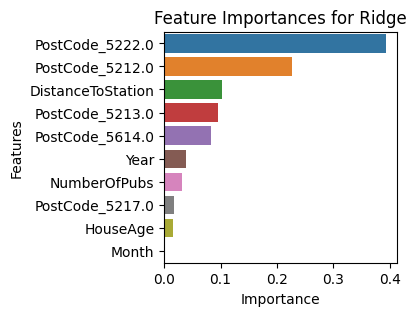

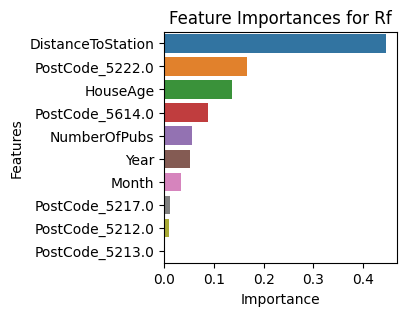

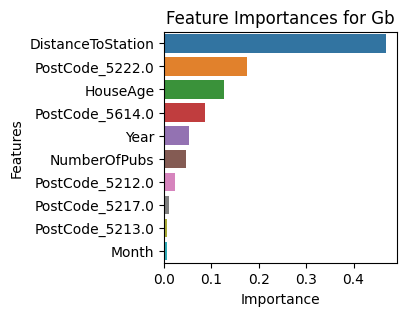

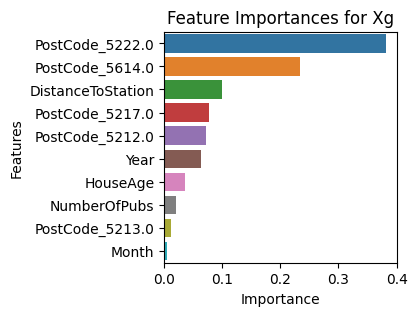

In [97]:
for model_name in fit_models.keys():
    plt.figure(figsize=(3, 3))
    sorted_imp = importance_df.sort_values(by=model_name, ascending=False)

    sns.barplot(
        x=sorted_imp[model_name],
        y=sorted_imp.index,
        data=sorted_imp,
        hue=sorted_imp.index,
    )

    plt.title(f"Feature Importances for {model_name.capitalize()}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

### Plot Trees

In [110]:
%pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

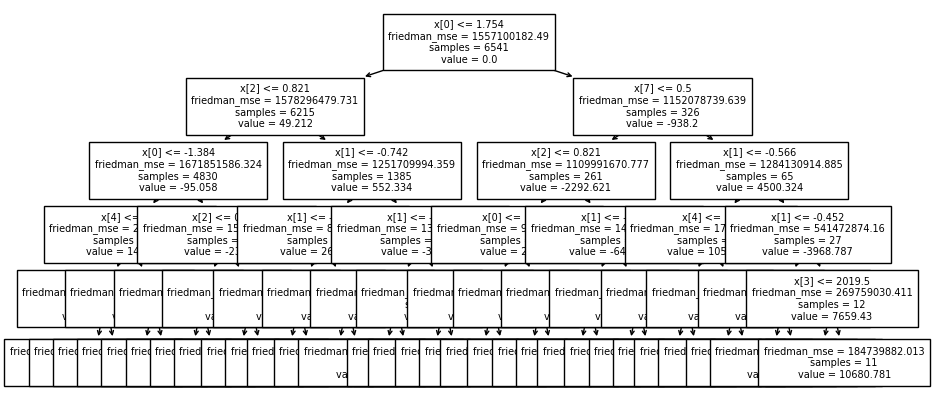

In [100]:
# Plot tree for gradient boosted model

plt.figure(figsize=(10, 5))
plot_tree(ensemble.estimators_[299, 0], fontsize=7)
plt.show()

In [101]:
ensemble.feature_names_in_[3]

'Year'

In [102]:
X_train.shape

(6541, 5)

### XGboost model

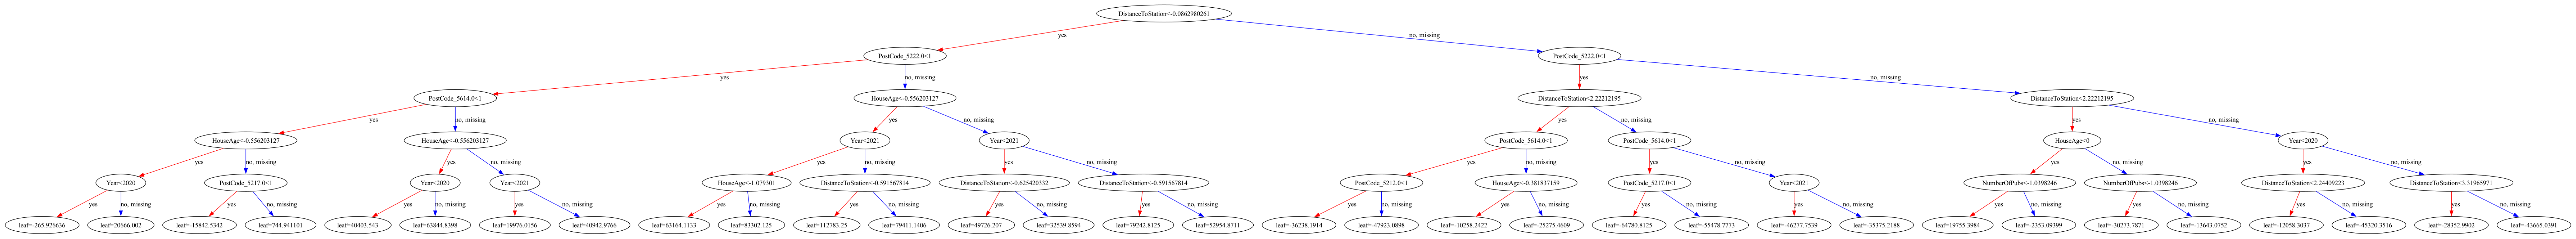

In [103]:
rcParams["figure.figsize"] = 100, 100
xgb.plot_tree(fit_models["xg"].best_estimator_[1])
plt.show()

# 7. Save model

In [104]:
import dill

In [105]:
model = fit_models["gb"]

In [106]:
# Save model using dill
with open("gb.pkl", "wb") as f:
    dill.dump(model, f)

In [107]:
with open("gb.pkl", "rb") as f:
    reloaded_model = dill.load(f)

In [108]:
reloaded_model.predict(X_test)

array([660072.29726806, 289177.79297644, 166619.49465334, ...,
       392935.05936691, 737461.9967578 , 400940.79244598])

In [109]:
X_test.loc[0].to_json()

'{"TransactionDate":"2020.12","HouseAge":17.0,"DistanceToStation":467.6447748,"NumberOfPubs":4.0,"PostCode":"5222.0"}'